# Introduction

The MNIST dataset consists of grayscale images with dimensions of 28x28 pixel handwriting digits from 0 through 9.

This results in a total of 784 features (pixels) per image, which make it challenging to directly visualize this dataset without dimensionality reduction techniques, having to visualize all 784 dimensions simultaneously.

Dimensionality reduction techniques like PCA or t-SNE can help reduce the dimensionality of the dataset while preserving important information.

# Importing Libraries

In [83]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Keras runs on top of open source machine libraries like TensorFlow, and allows us to quickly define deep learning models.

Keras provides a special module, datasets which contains MNIST dataset.
Datasets in keras are available here: https://www.tensorflow.org/api_docs/python/tf/keras/datasets.

# Load MNIST dataset

In [84]:
# Defined an object to load the dataset
mnist = tf.keras.datasets.mnist

In [137]:
# Load the training and test split of the MNIST dataset
# Calling load_data() on that object will give two tuples with two lists each. These will be the training and testing values for the graphics that contain the digits items and their labels.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Exploratory Data Analysis (EDA)

-- The dimensions of the dataset are checked using X_train.shape. This reveals the number of images and pixels in the dataset.

-- The unique classes in the target variable are displayed using np.unique(y). This shows the possible digits (0 to 9) present in the dataset.

In [138]:
# Look at the shape of the data:
data_shape = X_train.shape
print(f"There are {data_shape[0]} training examples with shape ({data_shape[1]}, {data_shape[2]})")
data_shape_test = X_test.shape
print(f"There are {data_shape_test[0]} testing examples with shape ({data_shape_test[1]}, {data_shape_test[2]})")

There are 60000 training examples with shape (28, 28)
There are 10000 testing examples with shape (28, 28)


In [87]:
# Check the unique classes in the target variable
print("\nUnique classes:")
print(np.unique(y_train))


Unique classes:
[0 1 2 3 4 5 6 7 8 9]


# Visualization of individual images

A few sample images from the dataset are plotted using imshow() to display the images format. The corresponding labels are also displayed for each image.

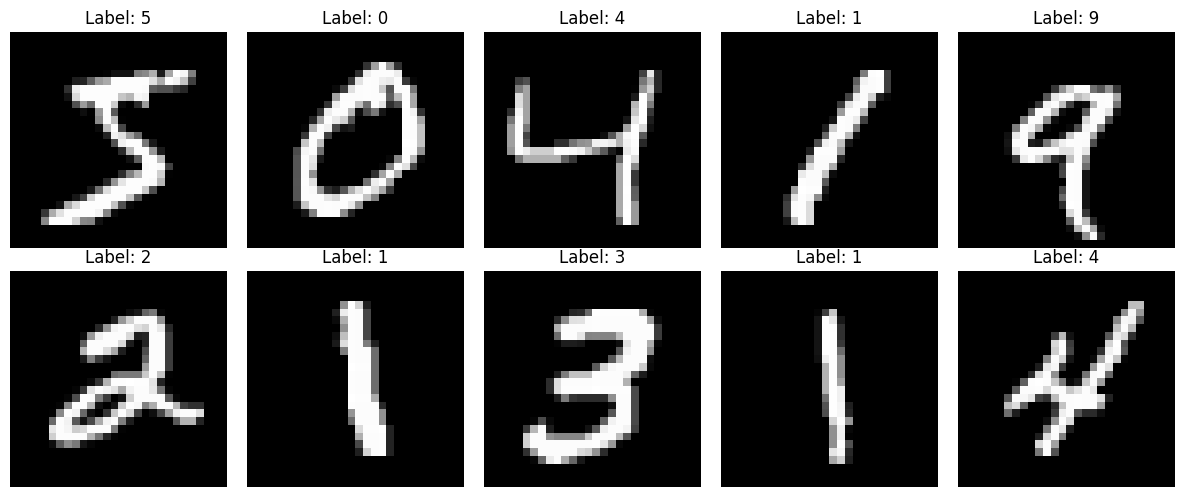

In [88]:
# Plot a few sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
  axes[i].imshow(X_train[i].reshape(28, 28))
  axes[i].axis('off')
  axes[i].set_title("Label: %s" % y_train[i])

plt.tight_layout()
plt.show()

A training image is printed below (both as an image and a numpy array), and the training label. Experiments can be done using a different index.

LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 

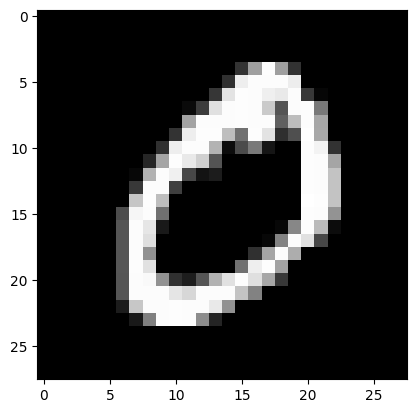

In [89]:
# Can put between 0 to 59999 here
index = 1

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {y_train[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {X_train[index]}')

# Visualize the image
plt.imshow(X_train[index])

In the MNIST dataset, each image consists of 784 pixels, which are arranged in a 28x28 grid. Each pixel represents a grayscale intensity value ranging from 0 to 255.

This code provides a visual representation of a single MNIST image by plotting the pixel values as a scatterplot, allowing you to see the spatial distribution of pixel intensities in the image.

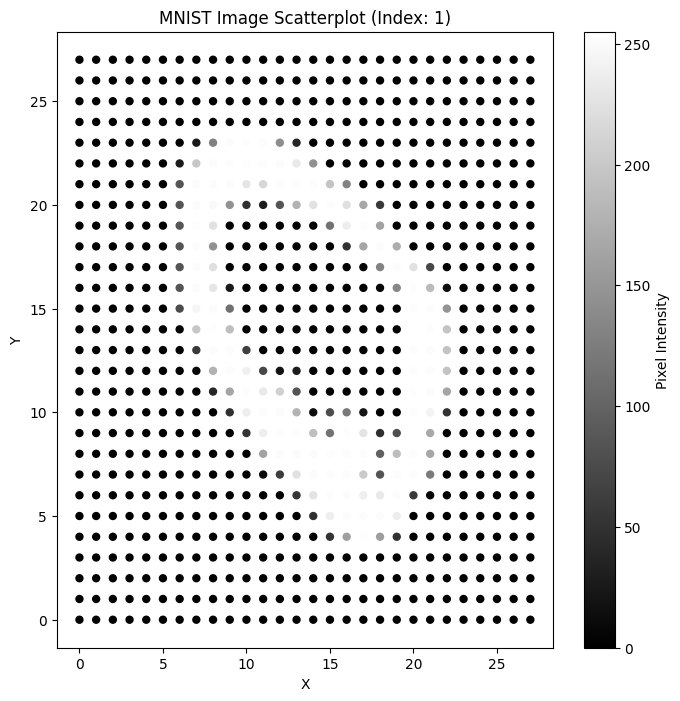

In [90]:
index = 1  # Index of the image you want to visualize

# Reshape the image to its original dimensions
image = X_train[index].reshape(28, 28)

# Generate x and y coordinates for scatterplot
x, y = np.meshgrid(range(28), range(28))

# Flatten the pixel array
pixels = image.flatten()

# Plot scatterplot
plt.figure(figsize=(8, 8))
plt.scatter(x, y, c=pixels, cmap='gray', s=25)
plt.colorbar(label='Pixel Intensity')
plt.title(f'MNIST Image Scatterplot (Index: {index})')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Data Processing

As can be seen above, all  pixel values are between 0 and 255. When training a neural network especially in image processing, it will usually learn better if values are scaled to between 0 and 1.

Also, scaling is mandatory before applying PCA.

In [139]:
# Reshaping the dataset
X_train = X_train.reshape(60000, 784) # 784 = 28x28
X_test = X_test.reshape(10000, 784)

# Normalize the pixel values of the train and test images
X_train = X_train / 255.0
X_test = X_test / 255.0


#  Principal Component Analysis (PCA)

PCA is a dimensionality reduction method that aims to reduce the number
of features while preserving as much information as possible.

PCA is a linear technique that works best with data that has a linear relationships.

A linear relationship refers to a relationship between two variables where the change in one variable is directly proportional to the change in the other variable. In other words, as one variable increases or decreases, the other variable changes by a constant amount multiplied by the change in the first variable.

The MNIST dataset the pixel values represent the features, and the labels represent the target variable.
The relationship between the pixel values and the labels is not linear because the visual representation of digits involves non-linear patterns and variations. However, it is possible to use linear methods like PCA to analyze  the MNIST dataset based on linear combinations of the pixel values. These methods may not capture the complex non-linear relationships present in the data but can still provide useful insights or results.

 PCA (Principal Component Analysis) identifies the directions or vectors in the data where the variance (information) is highest. These vectors are called principal components (PCs), and they capture the most important patterns or variations in the data.

The first principal component captures the maximum amount of variance in the data, followed by the second principal component, which captures the next maximum variance orthogonal (perpendicular) to the first principal component. Each subsequent principal component captures the remaining variance in the data orthogonal to the previously identified principal components.

The principal components are orthogonal to each other, meaning they are perpendicular in the feature space. This orthogonality property ensures that each principal component captures a unique and independent source of variation in the data. By representing the data in terms of these orthogonal principal components, PCA allows for a reduction in dimensionality while preserving the maximum amount of information.

In summary, PCA identifies the directions with the highest variance (principal components) in the data and represents the data in terms of these components, which are orthogonal to each other.

PCA is a powerful technique for reducing the dimensionality of complex datasets and gaining insights into the underlying patterns or structures present in the data.


In [92]:
# initializing the pca
from sklearn.decomposition import PCA

MNIST dataset contains 784 original features to be reduced to a smaller number of features while retaining as much information (variation) as posible.


In [93]:
# At the begining we do not know how many principal components will hold enough information. In 784 features is 100% all the information, let's start with all features as principal components.
n_components = 784
random_state = 43
whiten = False
pca784 = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [94]:
#Fit the PCA on the training set and set  to retain 100% of the variance
X_train_PCA_784 = pca784.fit_transform(X_train) # it's generating principal components
X_train_PCA_784 = pd.DataFrame(data =X_train_PCA_784 )

In [95]:
# Percentage of variance captured by 784 principal components
# As expected, 784 Principal Components explain 100% variance in the dataset
print(f"Variance Explained by all 784 Principal Components: {sum(pca784.explained_variance_ratio_)}")

Variance Explained by all 784 Principal Components: 0.999999999999999


Until now the dimensions of the dataset have not been reduced. We went from 784 features to 784 principal components.

In [96]:
# Percentage of variance captured by X principal components
variance = pd.DataFrame(data = pca784.explained_variance_ratio_) # created a dataframe with the variances of Principal Components
variance = variance.T
variance.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.097047,0.070959,0.061691,0.053894,0.048688,0.043122,0.032719,0.028839,0.02762,0.02357,...,3.497477e-34,3.497477e-34,3.497477e-34,3.497477e-34,3.435299e-34,2.346119e-34,2.039850e-34,6.245395e-35,4.158448e-35,3.141330e-35


In [97]:
#This code calculates the cumulative variance captured by including a specific number of top principal components in the PCA analysis.
print(f"Variance Captured by Top 2 Principal Components: {(variance.loc[:,0:1].sum(axis=1).values)}")
print(f"Variance Captured by Top 10 Principal Components: {(variance.loc[:,0:9].sum(axis=1).values)}")
print(f"Variance Captured by Top 50 Principal Components: {(variance.loc[:,0:49].sum(axis=1).values)}")
print(f"Variance Captured by Top 100 Principal Components: {(variance.loc[:,0:99].sum(axis=1).values)}")
print(f"Variance Captured by Top 300 Principal Components: {(variance.loc[:,0:299].sum(axis=1).values)}")

Variance Captured by Top 2 Principal Components: [0.16800588]
Variance Captured by Top 10 Principal Components: [0.4881498]
Variance Captured by Top 50 Principal Components: [0.82464686]
Variance Captured by Top 100 Principal Components: [0.91462857]
Variance Captured by Top 300 Principal Components: [0.98622875]


Using the Top 10 Principal Components, only 49% of the information in the original dataset will be kept.
However, using Top 300 Principal Components (instead of 784), over 98% of the original information is kept. It is a huge improvement, almost all the information is kept using 300 instead of 784 principal components.



**PCA 2 components**

In [142]:
random_state = 43
whiten = False
pca2 = PCA(n_components=2, whiten=whiten, random_state=random_state)
X_train_PCA_2 = pca2.fit_transform(X_train) # it's generating principal components
principal_df = pd.DataFrame(data=X_train_PCA_2, columns=['principal component 1', 'principal component 2'])
inv_pca2 = pca2.inverse_transform(X_train_PCA_2)
loss_pca2 = ((X_train - inv_pca2) ** 2).mean()


In [145]:
loss_pca2

0.05595270317760798

Text(0, 0.5, 'Principal Component 2')

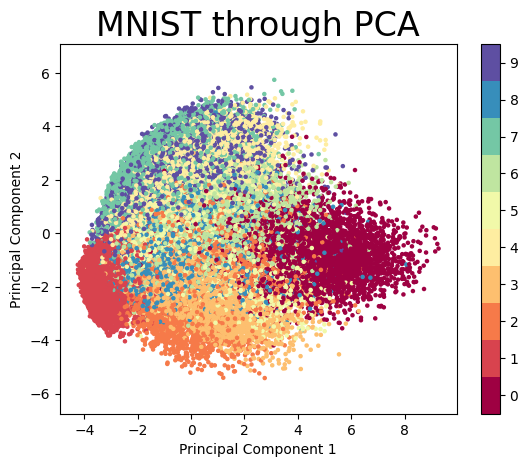

In [134]:
#Plotting the observations using 2 dimensions (2 Principal Components)
plt.scatter(X_train_PCA_2[:, 0], X_train_PCA_2[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


PCA is very powerfull, it does not use the labels (unsupervised learning), and using only 2 dimensions (the top 2 Principal Components), it has learned how to differenciate the digits while holding only 16% of the information.

In [154]:
#Fit the PCA on the training set with the 300 principal components
n_components = 300
random_state = 43
whiten = False
pca300 = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

X_train_PCA = pca300.fit_transform(X_train) # it's generating 300 principal components
X_train_PCA = pd.DataFrame(data =X_train_PCA )

Text(0, 0.5, 'Cumulative explained variance')

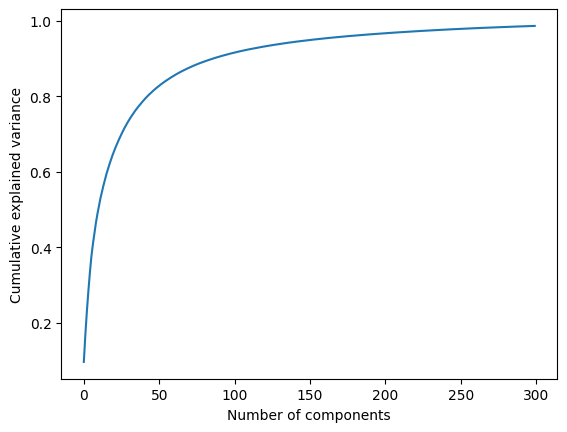

In [100]:
plt.plot(np.cumsum(pca300.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In plot above we can see that cumulative explained variance is very high (98.6%). That means that data describing changes is mostly contained in 300 components.

In [101]:
print(X_train.shape)
print(X_train_PCA.shape)
#What really PCA does?
print(f"The test data gets reduced from {X_train.shape} to {X_train_PCA.shape}")

(60000, 784)
(60000, 300)
The test data gets reduced from (60000, 784) to (60000, 300)


**Inverse Transformation**

PCA decomposition can be inverted
In the process of reconstructing the original dimensions from the reduced dimensions, some information is lost as we keep only selected principal components.
Let's see how images look after reconstructing them from only 300 Principal Components.

In [155]:
inv_pca = pca300.inverse_transform(X_train_PCA)

**Reconstruction Loss**

The reconstruction loss is a measure of how well the PCA model is able to reconstruct the input data.

By calculating the reconstruction loss, you can assess how well the PCA model is able to preserve the information and reconstruct the original input data. A lower reconstruction loss indicates a better reconstruction quality.

In [156]:
loss_pca=((X_train - inv_pca) ** 2).mean()
print("Reconstruction loss from PCA:",loss_pca)

Reconstruction loss from PCA: 0.0009405132490512861


**Visualizing one original image and its representations using different numbers of principal components**

Let us see a representation of one original image which is then represented by using 1 PCA, 10 PCA, 100 PCA and 300 PCA.

The reason for calculating the reconstruction manually instead of using pca.inverse_transform() is to avoid a shape value error.

The shape value error occurred because pca.inverse_transform() expects a 2D array as input, where each row represents a sample. However, when you were trying to pass a 1D array (single sample) to pca.inverse_transform(), it caused the shape mismatch error.

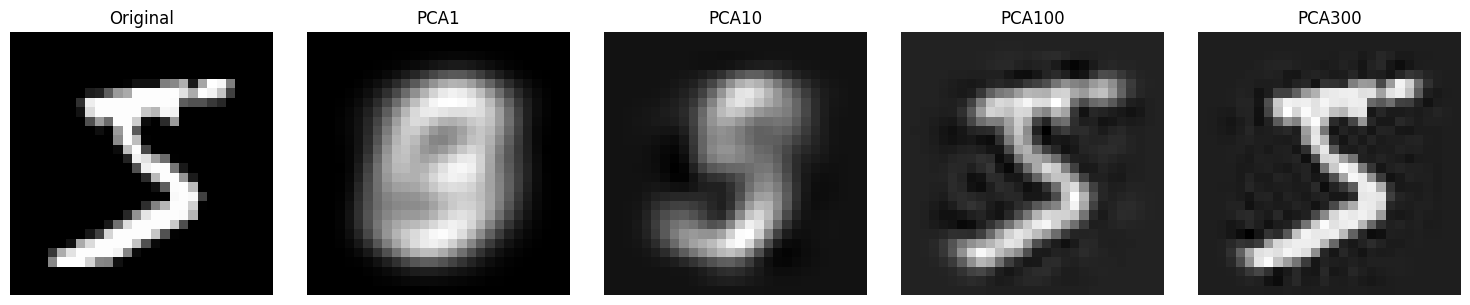

In [104]:
import matplotlib.pyplot as plt

image_index = 0  # Index of the original image to display

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Display the original image
axes[0].imshow(X_train[image_index].reshape((28, 28)), cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original')

# Display PCA1
pca1 = PCA(n_components=1, random_state=random_state)
projected = pca1.fit_transform(X_train)
reconstructed = pca1.inverse_transform(projected)
axes[1].imshow(reconstructed[image_index].reshape((28, 28)), cmap='gray')
axes[1].axis('off')
axes[1].set_title('PCA1')

# Display PCA10
pca10 = PCA(n_components=10, random_state=random_state)
projected = pca10.fit_transform(X_train)
reconstructed = pca10.inverse_transform(projected)
axes[2].imshow(reconstructed[image_index].reshape((28, 28)), cmap='gray')
axes[2].axis('off')
axes[2].set_title('PCA10')

# Display PCA100
pca100 = PCA(n_components=100, random_state=random_state)
projected = pca100.fit_transform(X_train)
reconstructed = pca100.inverse_transform(projected)
axes[3].imshow(reconstructed[image_index].reshape((28, 28)), cmap='gray')
axes[3].axis('off')
axes[3].set_title('PCA100')

# Display PCA300
projected = pca300.transform(X_train)
reconstructed = pca300.inverse_transform(projected)
axes[4].imshow(reconstructed[image_index].reshape((28, 28)), cmap='gray')
axes[4].axis('off')
axes[4].set_title('PCA300')

plt.tight_layout()
plt.show()



**Displaying several digits**
original (above) and reconstructed using 300 Principal Components (below)

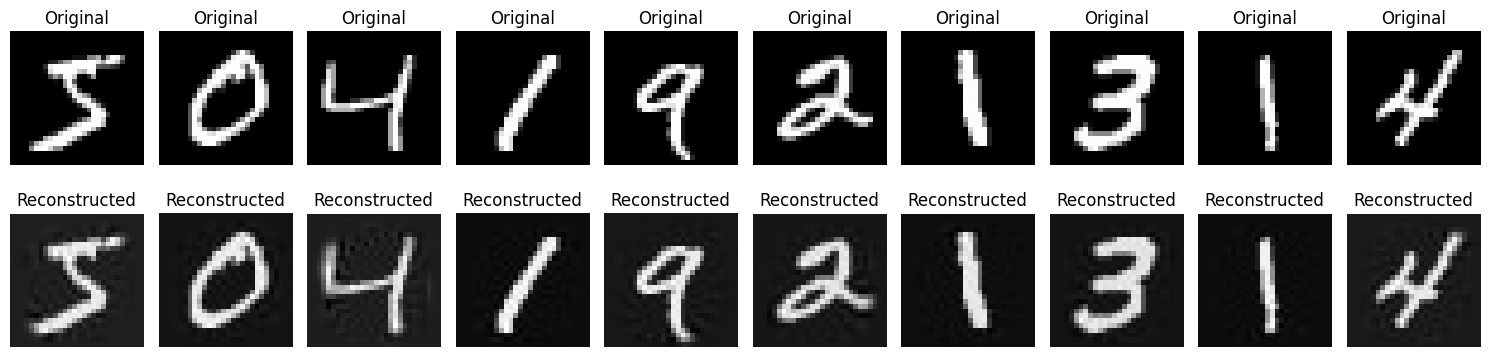

In [106]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i in range(10):
    # Display original image
    axes[0, i].imshow(X_train[i].reshape((28, 28)), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # Reconstruct image using inverse PCA with 300 components
    pca300 = PCA(n_components=300, random_state=random_state)
    projected = pca300.fit_transform(X_train)
    reconstructed = pca300.inverse_transform(projected)
    axes[1, i].imshow(reconstructed[i].reshape((28, 28)), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Reconstructed')

plt.tight_layout()
plt.show()



After inverting PCA, the original images (above) and the reconstructed images (below) are really similar. The quality of the reconstructed image did not decreased in comparison to original.

# t-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for visualizing high-dimensional data. Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line.

**PCA preserves the variance in the data, whereas t-SNE preserves the relationships between data points in a lower-dimensional space**, making it quite a good algorithm for visualizing complex high-dimensional data.

t-SNE is an algorithm used for visualizing high-dimensional data in a lower-dimensional space. It works by measuring the similarities between data points in the high-dimensional space and then mapping them onto a lower-dimensional space while preserving those similarities. Initially, random positions are assigned to the points in the lower-dimensional space, and the algorithm iteratively adjusts these positions to best match the original similarities. It focuses on preserving local relationships between points, ensuring that nearby points in the high-dimensional space remain close in the lower-dimensional representation. The process continues until the algorithm finds a stable configuration. The resulting lower-dimensional map can then be used to visualize and analyze the data.

It's important to note that t-SNE is a stochastic algorithm, meaning that each run may produce slightly different results. It is also sensitive to the choice of hyperparameters, such as the perplexity (a parameter controlling the number of neighbors considered during similarity calculations) and the learning rate (a parameter controlling the step size in the optimization process). Experimentation and tuning of these parameters may be required to obtain the best results for a given dataset. In this case the default hyperparameters have been used.

**Notes about t-SNE**

The Barnes-Hut algorithm implementation in scikit-learn's t-SNE restricts the number of components to be less than or equal to 4 due to its reliance on quad-tree or oct-tree structures.

For the MNIST dataset, which consists of images of handwritten digits, a common starting point for t-SNE would be to use two or three components for visualization. This means reducing the original 784-dimensional images to 2 or 3 dimensions using t-SNE.

In [ ]:
from sklearn.manifold import TSNE
# Perform t-SNE
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)

Text(0.5, 1.0, 't-SNE')

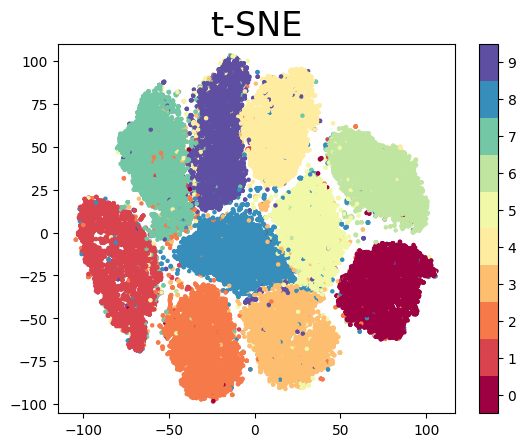

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s=5, c=y_train, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('t-SNE', fontsize=24)

The scatter plot visualizes the lower-dimensional representation of the MNIST dataset using t-SNE. It helps reveal patterns, clusters, and separations among the digits in the dataset. Each marker represents a data point (an image of a digit), and the positioning of the markers in the scatter plot reflects their relationships in the lower-dimensional space.

The visualization allows you to gain insights into the structure of the dataset and observe if the different digits form distinct clusters or overlap with each other. It can also help identify any potential outliers or anomalies.

**Reconstruction Loss**

The concept of reconstruction loss is not applicable to t-SNE in the same way as it is with PCA. t-SNE focuses on preserving the local structure and neighborhood relationships in the data, rather than reconstructing the original data points. Therefore, calculating a reconstruction loss after using t-SNE is not a standard or meaningful procedure.

**Conclusion of t-SNE results on MNIST**

**t-SNE has given much better result as compared to PCA for 2 dimensions (or 2 Principal Components). Visualization form t-SNE is much more distinguishable and all the digits are well clustered in groups.**

# Autoencoders

Autoencoders are neural networks that excel at training on unlabelled data. They are widely used for various tasks, including dimensionality reduction and visualization. With their ability to encode and decode data, autoencoders can compress large images into smaller representations while preserving essential features. This differs from traditional compression methods like JPEG, which employ lossy techniques to achieve compression but may sacrifice some image information in the process. Autoencoders strive to retain the most important characteristics of the input data, making them valuable tools for data compression and reconstruction.

In [146]:
# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = tf.keras.layers.Dense(1000, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(500, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(250, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(250, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(500, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(1000, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


In [149]:
# Compile and train the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
235/235 [==============================] - 33s 131ms/step - loss: 0.0107 - val_loss: 0.0114
Epoch 2/10
235/235 [==============================] - 33s 140ms/step - loss: 0.0100 - val_loss: 0.0112
Epoch 3/10
235/235 [==============================] - 32s 138ms/step - loss: 0.0099 - val_loss: 0.0114
Epoch 4/10
235/235 [==============================] - 32s 136ms/step - loss: 0.0097 - val_loss: 0.0111
Epoch 5/10
235/235 [==============================] - 30s 129ms/step - loss: 0.0095 - val_loss: 0.0109
Epoch 6/10
235/235 [==============================] - 35s 147ms/step - loss: 0.0094 - val_loss: 0.0110
Epoch 7/10
235/235 [==============================] - 30s 129ms/step - loss: 0.0093 - val_loss: 0.0110
Epoch 8/10
235/235 [==============================] - 32s 136ms/step - loss: 0.0092 - val_loss: 0.0109
Epoch 9/10
235/235 [==============================] - 31s 132ms/step - loss: 0.0091 - val_loss: 0.0107
Epoch 10/10
235/235 [==============================] - 32s 135ms/step - l

After 10 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.009. We can try to visualize the reconstructed inputs and the encoded representations.

In [150]:
# Encode and decode some digits
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 3s 10ms/step


**Visualizing inputs and encoded representations**

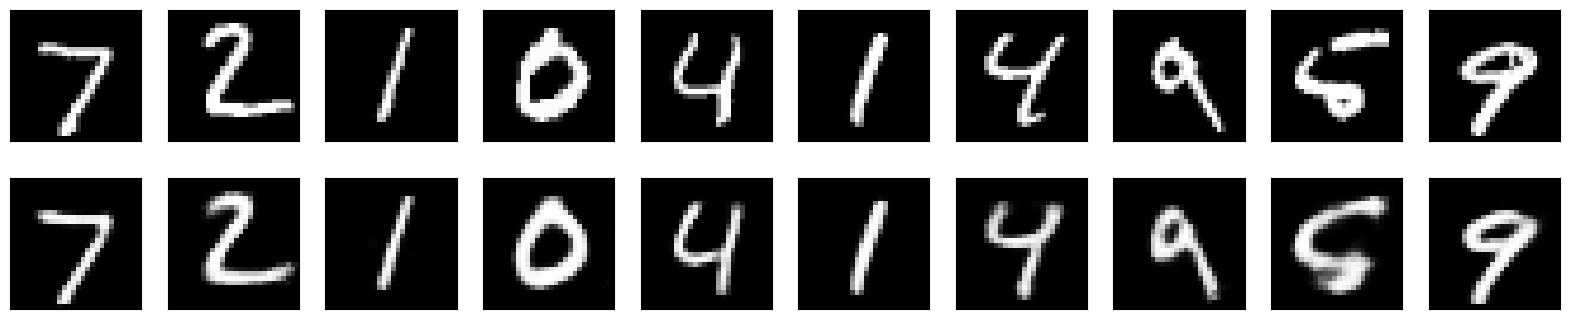

In [151]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Loss comparison: PCA vs Autoencoder**

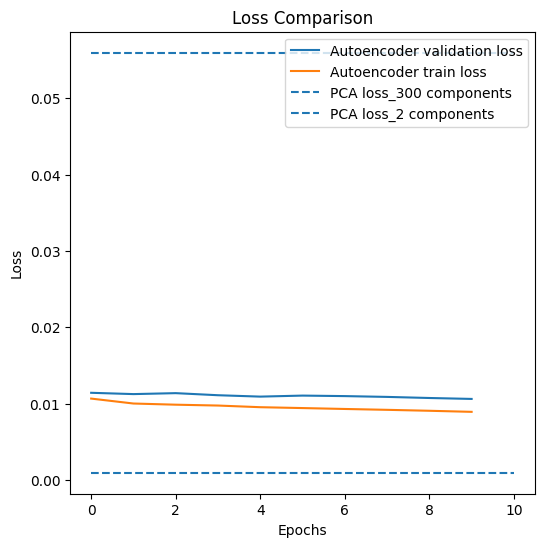

In [158]:
loss_autoencoder = history.history['loss'][0]

plt.figure(figsize=(6, 6))

plt.plot(history.history['val_loss'], label='Autoencoder validation loss')
plt.plot(history.history['loss'], label='Autoencoder train loss')

plt.hlines(y=loss_pca, xmin=0, xmax=10, label='PCA loss_300 components', linestyles='dashed')
plt.hlines(y=loss_pca2, xmin=0, xmax=10, label='PCA loss_2 components', linestyles='dashed')


plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.show()



The autoencoder achieved a reconstruction loss of 0.09, which is lower than the PCA with 2 components (0.055). This suggests that the autoencoder was able to preserve more information during the decompression process compared to PCA with only 2 components.

However, it's important to note that PCA with 300 components achieved an even lower reconstruction loss of 0.0009, indicating that it was able to preserve more information than both the autoencoder and PCA with 2 components. The higher loss of the autoencoder compared to PCA with 300 components suggests that the autoencoder might not have captured all the important variations present in the data.

In summary, the autoencoder performed better than PCA with 2 components in terms of information preservation, but it was outperformed by PCA with 300 components. The choice of the number of components in PCA can significantly impact the preservation of information during the decompression process.

In an autoencoder, changing all of the activation functions to linear would indeed result in the network converging to the same loss as PCA. Activation functions introduce non-linearities into the network, allowing it to learn more complex patterns and relationships in the data. By using linear activation functions, the autoencoder would essentially reduce to a linear transformation, similar to PCA.

PCA is a linear technique that aims to find linear combinations of variables that capture the maximum variance in the data. By transforming the data using these linear combinations, PCA achieves dimensionality reduction. Similarly, by using linear activation functions throughout the autoencoder network, the network's behavior would become linear, and it would approximate PCA.

Therefore, changing the activation functions to linear in the autoencoder network would make it equivalent to PCA, resulting in both approaches converging to the same loss.

# Conclusion

**Principal Component Analysis (PCA)** is a powerful tool for dimensionality reduction. However, it assumes that the components are linear combinations of the original features and that they are orthogonal to each other. This assumption can limit PCA's ability to capture all the complex relationships that may exist between the input features, especially when the relationships are nonlinear.

**t-SNE (t-Distributed Stochastic Neighbor Embedding)** is another dimensionality reduction technique that can handle nonlinear relationships in the data. It is particularly effective in visualizing high-dimensional data in low-dimensional space, typically two or three dimensions.

**Autoencoder** are neural network architectures that can learn non-linear relationships in high-dimensional data. They consist of an encoder network that compresses the input data into a low-dimensional representation and a decoder network that reconstructs the original data from the compressed representation.

**Based on the results obtained from applying these three algorithms (Autoencoder, PCA, and t-SNE) to the MNIST dataset:**

- The Autoencoder was able to preserve more information during the decompression process compared to PCA 2 components. This indicates that the Autoencoder, with its ability to capture non-linear relationships in the data, was better suited for maintaining important features and patterns when reconstructing the images. It can handle the non-linearities present in the data, resulting in a more faithful reconstruction.

- In terms of visualization, t-SNE has provided better results compared to PCA for reducing the high-dimensional data to two dimensions. The visualization produced by t-SNE allows for clearer differentiation between different digit classes, as the clusters of digits are well-separated and distinct. This suggests that t-SNE was able to capture the underlying structure and similarities in the data more effectively, leading to a more visually appealing and informative representation.

**In summary, the Autoencoder outperformed PCA 2 components in terms of information preservation, and t-SNE yielded superior visualization results for distinguishing between digit classes in the MNIST dataset.**